In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

This is the tutorial for multidimensional matrix profile found on https://stumpy.readthedocs.io/en/latest/Tutorial_Multidimensional_Motif_Discovery.html

In [2]:
df = pd.read_csv("https://zenodo.org/record/4328047/files/toy.csv?download=1")
df.head()

,T1,T2,T3
0,0.565117,0.637180,0.741822
1,0.493513,0.629415,0.739731
2,0.469350,0.539220,0.718757
3,0.444100,0.577670,0.730169
4,0.373008,0.570180,0.752406


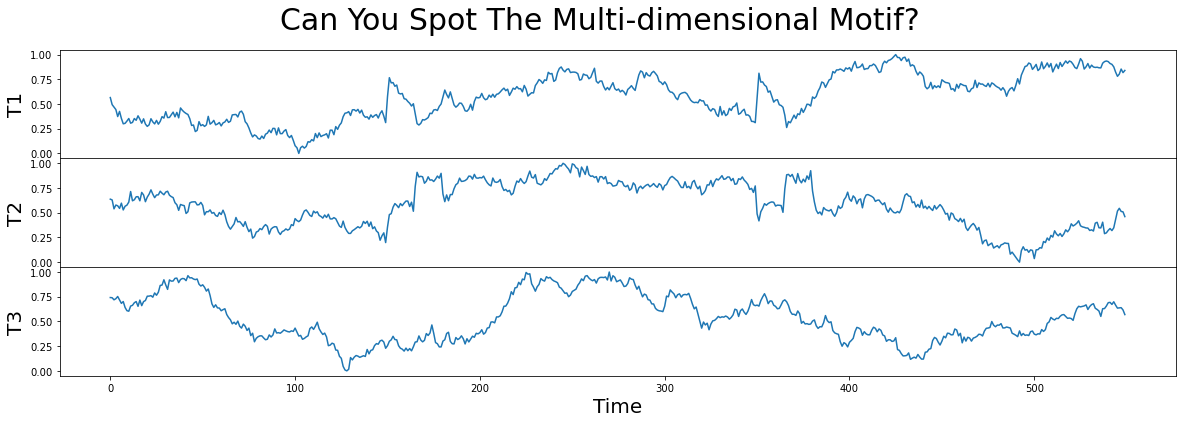

In [3]:
fig, axs = plt.subplots(df.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')

for i in range(df.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].plot(df[f'T{i + 1}'])

plt.show()

In [4]:
m = 30
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in df.columns:
    mps[dim_name] = stumpy.stump(df[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]

The motif pair matrix profile value in T1 is 1.1
The motif pair matrix profile value in T2 is 1.0
The motif pair matrix profile value in T3 is 1.1


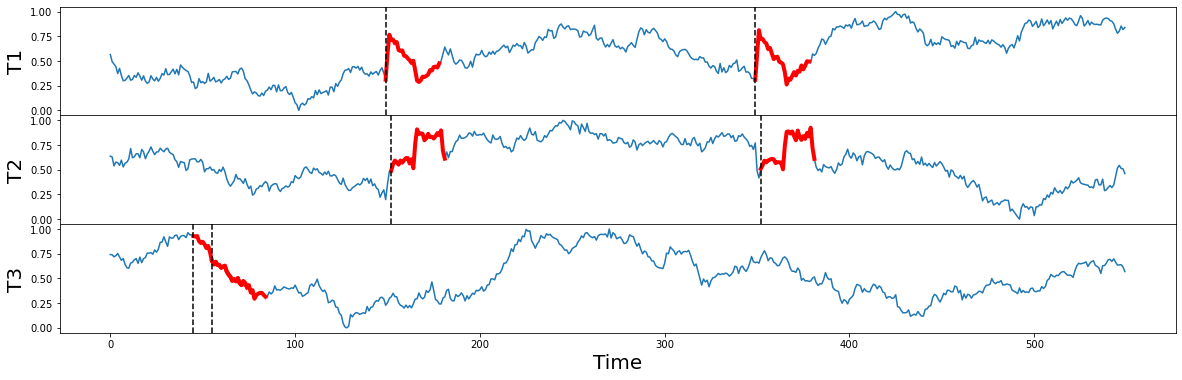

In [5]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})

for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='20')
    axs[i].plot(df[dim_name])
    axs[i].set_xlabel('Time', fontsize ='20')
    for idx in motifs_idx[dim_name]:
        axs[i].plot(df[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')

plt.show()

In [8]:
mps, indices = stumpy.mstump(df, m)

In [9]:
motifs_idx = np.argsort(mps, axis=1)[:, 0]

In [10]:
nn_idx = indices[np.arange(len(motifs_idx)), motifs_idx]

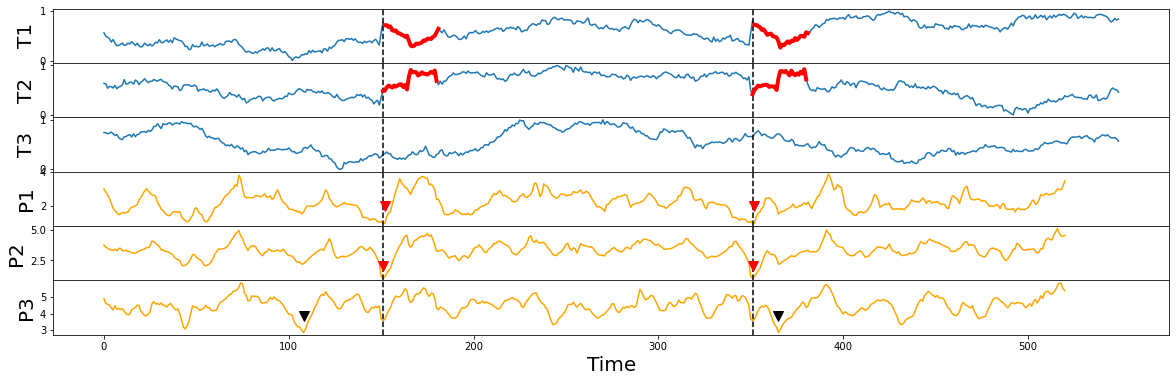

In [11]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})

for k, dim_name in enumerate(df.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k].axvline(x=nn_idx[1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=nn_idx[1], linestyle="dashed", c='black')

    if dim_name != 'T3':
        axs[k].plot(range(motifs_idx[k], motifs_idx[k] + m), df[dim_name].iloc[motifs_idx[k] : motifs_idx[k] + m], c='red', linewidth=4)
        axs[k].plot(range(nn_idx[k], nn_idx[k] + m), df[dim_name].iloc[nn_idx[k] : nn_idx[k] + m], c='red', linewidth=4)
        axs[k + mps.shape[0]].plot(motifs_idx[k], mps[k, motifs_idx[k]] + 1, marker="v", markersize=10, color='red')
        axs[k + mps.shape[0]].plot(nn_idx[k], mps[k, nn_idx[k]] + 1, marker="v", markersize=10, color='red')
    else:
        axs[k + mps.shape[0]].plot(motifs_idx[k], mps[k, motifs_idx[k]] + 1, marker="v", markersize=10, color='black')
        axs[k + mps.shape[0]].plot(nn_idx[k], mps[k, nn_idx[k]] + 1, marker="v", markersize=10, color='black')

plt.show()